In [3]:
from DataAcquisition import cand_latlon, resi_lat, resi_lon
import numpy as np
from sklearn.cluster  import KMeans
from random import sample

Define k for the number of transformers we want, get random sample from cand_lat_lon

In [4]:
k = 10
sample_ind = sample(range(len(cand_latlon)), k)
cand_sample_list = [[cand_latlon[i][0], cand_latlon[i][1]] for i in sample_ind]

In [5]:
cand_sample_list

[[32.5270271, 76.1436358],
 [32.5289602, 76.1394123],
 [32.527528, 76.1433082],
 [32.5278726, 76.1414281],
 [32.5284035, 76.1392404],
 [32.5302624, 76.1417557],
 [32.5291121, 76.1408837],
 [32.5275507, 76.1401781],
 [32.5290361, 76.1413984],
 [32.5294965, 76.1416128]]

# Preparing for K-Means

In [6]:
residential = np.array([[resi_lat[i], resi_lon[i]] for i in range(len(resi_lat))])

In [7]:
residential_cand_site = np.concatenate((residential, np.array(cand_sample_list)))

# Kmeans Algorithm

In [8]:
compute = KMeans(n_clusters = k, random_state=0)

### Computing for the first time

In [9]:
def returnClusterCenters(points):
    return compute.fit(points)

In [10]:
findKmeans = returnClusterCenters(residential_cand_site)

# Finding the nearest candidate site

In [11]:
from math import inf, sqrt

def distance(cor1, cor2):
    return sqrt((cor1[0]*cor1[0]-cor2[0]*cor2[0])**2+(cor1[1]*cor1[1]-cor2[1]*cor2[1])**2)

def findNearest(curr_clusters):
    req = [0 for i in range(k)]
    for i in range(k):
        tmp = inf
        for j in range(len(cand_latlon)):
            dis = distance(cand_latlon[j], curr_clusters[i])
            if (dis < tmp):
                tmp = dis
                req[i] = cand_latlon[j]
    return req

# Running the convergence Algorithm

In [12]:
from time import sleep
iters = 10
for i in range(iters):
    curr_centers = compute.fit(residential_cand_site).cluster_centers_;
    curr_cand = findNearest(curr_centers)
    residential_cand_site[-k:] = np.array(curr_cand)

In [13]:
curr_cand

[(32.5289607, 76.1401036),
 (32.5302781, 76.1421064),
 (32.5284811, 76.1413483),
 (32.5291121, 76.1408837),
 (32.5277319, 76.1408816),
 (32.5270271, 76.1436358),
 (32.5293833, 76.1397259),
 (32.5275507, 76.1401781),
 (32.5304523, 76.1410762),
 (32.5289602, 76.1394123)]

# Visualizing the convergence Algorithm

In [16]:
# def optimalLocationFinder(k):
#     compute = KMeans(n_clusters = k, random_state=0)
#     residential = np.array([[resi_lat[i], resi_lon[i]] for i in range(len(resi_lat))])
#     extra = compute.fit(residential).cluster_centers_

#     residential_cand_site = np.concatenate((residential, np.array(extra)))
    
#     iters = 100
#     for i in range(iters):b
#         curr_centers = compute.fit(residential_cand_site).cluster_centers_
#         curr_cand = findNearest(curr_centers, k)
#         residential_cand_site[-k:] = np.array(curr_cand)

IndentationError: unexpected indent (3030662637.py, line 10)

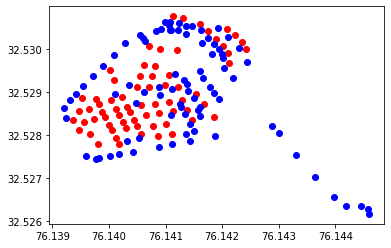

In [32]:
import matplotlib.pyplot as plt
x = [residential[i][0] for i in range(len(residential))]
y = [residential[i][1] for i in range(len(residential))]
xcand = [cand_latlon[i][0] for i in range(len(cand_latlon))]
ycand = [cand_latlon[i][1] for i in range(len(cand_latlon))]
plt.scatter(y, x, color="red")
plt.scatter(ycand, xcand, color="blue")

[(32.5261692, 76.1445914),
 (32.5262791, 76.1445771),
 (32.5263446, 76.1444538),
 (32.5263627, 76.1441883),
 (32.5265694, 76.1439772),
 (32.5270271, 76.1436358),
 (32.527528, 76.1433082),
 (32.5280438, 76.1429961),
 (32.5282134, 76.1428816),
 (32.5293252, 76.14219),
 (32.5295705, 76.1420269),
 (32.5298833, 76.141819),
 (32.5301484, 76.1416428),
 (32.5303419, 76.1413681),
 (32.5304469, 76.141219),
 (32.5304507, 76.1411026),
 (32.5304523, 76.1410762),
 (32.5304568, 76.1409194),
 (32.5304226, 76.1408242),
 (32.5303257, 76.1405546),
 (32.5301312, 76.1402918),
 (32.5298684, 76.1400944),
 (32.5295956, 76.1398896),
 (32.5293833, 76.1397259),
 (32.529132, 76.1395413),
 (32.5289602, 76.1394123),
 (32.5288241, 76.1393101),
 (32.5286197, 76.1392127),
 (32.5284035, 76.1392404),
 (32.5275125, 76.1395998),
 (32.5274446, 76.1397661),
 (32.5274615, 76.1398315),
 (32.5275102, 76.140021),
 (32.5275507, 76.1401781),
 (32.5276133, 76.1404211),
 (32.5277319, 76.1408816),
 (32.5277926, 76.1411173),
 (32.527